Importing Modules

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle

In [59]:
heart_dataset=pd.read_csv("C:/Users/HP/Desktop/PDO1/Dataset/heart.csv")


In [60]:
heart_dataset.shape

(303, 14)

In [61]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
heart_dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [63]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [65]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [66]:
heart_dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [67]:
X=heart_dataset.drop(columns="target",axis=1)
Y=heart_dataset['target']

In [68]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [69]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Train_Test_Split

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [71]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Data Standardization

In [72]:
scaler=StandardScaler()

In [73]:
scaler.fit(X_train)

StandardScaler()

In [74]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [75]:
print(X_train)

[[ 1.61047991 -1.46385011  2.04442042 ...  0.94818498  1.20703366
  -0.56122273]
 [ 1.28205058  0.68313005  0.05747367 ... -0.6677359   2.16789598
  -2.21751422]
 [ 0.0778097  -1.46385011 -0.93599971 ... -0.6677359   0.24617134
   1.09506875]
 ...
 [-0.36009607 -1.46385011  1.05094704 ...  0.94818498 -0.71469098
  -0.56122273]
 [ 0.0778097   0.68313005  0.05747367 ...  0.94818498 -0.71469098
  -0.56122273]
 [ 1.0630977  -1.46385011 -0.93599971 ...  0.94818498 -0.71469098
  -0.56122273]]


Model Training

In [76]:
model=LogisticRegression()

In [77]:
model.fit(X_train,Y_train)

LogisticRegression()

Model Evalution

Accuracy Score

In [78]:
X_train_predict=model.predict(X_train)
accuracy_score(X_train_predict,Y_train)

0.8429752066115702

In [79]:
X_test_predict=model.predict(X_test)
accuracy_score(X_test_predict,Y_test)

0.8032786885245902

In [80]:
classification_report(X_test_predict,Y_test)

'              precision    recall  f1-score   support\n\n           0       0.68      0.86      0.76        22\n           1       0.91      0.77      0.83        39\n\n    accuracy                           0.80        61\n   macro avg       0.79      0.82      0.80        61\nweighted avg       0.83      0.80      0.81        61\n'

In [81]:
cm=confusion_matrix(X_test_predict,Y_test)
print(cm)

[[19  3]
 [ 9 30]]


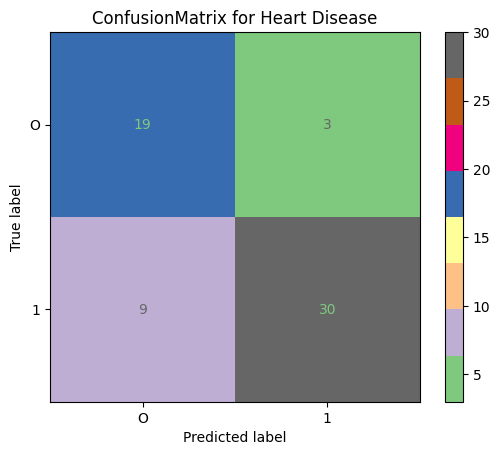

In [82]:
cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['O','1'])
cmd.plot(cmap='Accent')
plt.title("ConfusionMatrix for Heart Disease")
plt.show()

In [83]:



feature_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]


input_data = [74,0,1,120,269,0,0,121,1,0.2,2,1,2]


input_data_as_df = pd.DataFrame([input_data], columns=feature_names)


input_data_as_numpy_array = np.asarray(input_data_as_df)


input_data_reshape = input_data_as_numpy_array.reshape(1, -1)


std_data = scaler.fit_transform(input_data_reshape)




prediction = model.predict(std_data)



if prediction[0] == 1:
    print("The person has heart disease.")
    
else:
  print("The person does not have heart disease.")


The person has heart disease.


In [84]:
filename='heart_model.sav'
pickle.dump(model,open(filename,'wb'))
diabetes_model=pickle.load(open('heart_model.sav','rb'))



In [85]:

scaler_filename = 'scaler1.sav'
pickle.dump(scaler, open(scaler_filename, 'wb'))
scaler_heart = pickle.load(open("scaler1.sav", 'rb')) 